F1 score: 0.9448818897637795
Recall: 0.9523809523809523
Precision: 0.9375
AUC: 0.9576719576719577
Balanced accuracy: 0.9576719576719577


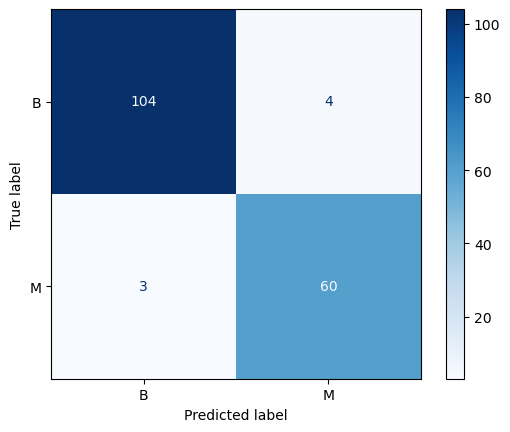

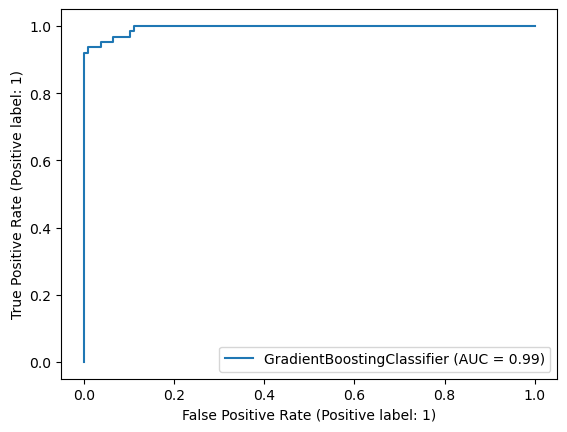

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, recall_score, precision_score, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")


# Load data from the CSV file
data = pd.read_csv('breast-cancer.csv')

# Separating features and target variable
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis'].map({'M': 1, 'B': 0}) # convert to 0 and 1 labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Gradient Boosting classifier with default parameters
clf = GradientBoostingClassifier(random_state = 1)

k = 10
cv_scores = cross_val_score(clf, X, y, cv=k)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = clf.predict(X_test)

# Outputs of the performance metrics
print("F1 score:", float(f1_score(y_test, y_pred)))
print("Recall:", float(recall_score(y_test, y_pred)))
print("Precision:", float(precision_score(y_test, y_pred)))
print("Balanced accuracy:", float(balanced_accuracy_score(y_test, y_pred)))
print("AUC:", float(roc_auc_score(y_test, y_pred)))



# Confusion matrix
plot_confusion_matrix(clf, X_test, y_test, display_labels=['B', 'M'], cmap=plt.cm.Blues)
plt.show()

# ROC curve
plot_roc_curve(clf, X_test, y_test)
plt.show()


In [3]:
print("\nCross-Validation Scores:", cv_scores)
print("\nAverage Cross-Validation Score:", cv_scores.mean())



Cross-Validation Scores: [0.98245614 0.89473684 0.92982456 0.94736842 0.98245614 0.96491228
 0.94736842 1.         0.96491228 0.98214286]

Average Cross-Validation Score: 0.9596177944862155
